In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)
import warnings
warnings.filterwarnings('ignore')

获取具备预设相关系数的随机数序列

<img style="float: left;" src="123.png" width="50%"> 


In [2]:
def corr_random(n,mean,cov):
    '''
    功能：获取具备预设相关系数的随机数序列  作为股票收益率时间序列
    输入：1.随机数长度n
          2.随机数均值mean
          3.协方差矩阵cov
    输出：随机数array 满足协方差矩阵
    '''
    # np.random.seed(0)
    num_samples = n
    mu = mean
    r = cov
    rng = np.random.default_rng()
    # 生成正态随机数序列
    y = rng.multivariate_normal(mu, r, num_samples,check_valid = 'raise',tol = 1e-8,method = 'cholesky')
    return y


# 输入一个给定的协方差矩阵

In [3]:
n = 10000
mean = np.array([0.0, 0.0, 0.0])
rcov = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])
#调用函数
rdata = corr_random(n,mean,rcov)

<AxesSubplot:>

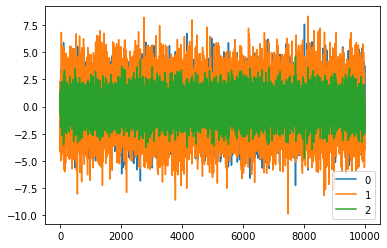

In [4]:
# 绘制符合rcov要求的随机数变化图
rdata = pd.DataFrame(rdata)
rdata.plot()

In [5]:
#检查cov是否与给定一致
temp = rdata.cov()
temp

,0,1,2
0,3.420008,-2.759593,-2.011735
1,-2.759593,5.497063,1.503771
2,-2.011735,1.503771,1.257560


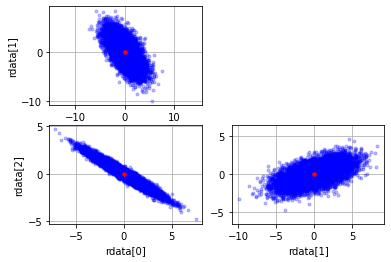

In [6]:
#观察生成的随机序列之间的散点图相关性
plt.subplot(2,2,1)
plt.plot(rdata.iloc[:,0], rdata.iloc[:,1], 'b.', alpha=0.25)
plt.plot(mean[0], mean[1], 'ro', ms=3.5)
plt.ylabel('rdata[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(rdata.iloc[:,0], rdata.iloc[:,2], 'b.', alpha=0.25)
plt.plot(mean[0], mean[2], 'ro', ms=3.5)
plt.xlabel('rdata[0]')
plt.ylabel('rdata[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(rdata.iloc[:,1], rdata.iloc[:,2], 'b.', alpha=0.25)
plt.plot(mean[1], mean[2], 'ro', ms=3.5)
plt.xlabel('rdata[1]')
plt.axis('equal')
plt.grid(True)

plt.show()

# 输入一个随机生成的半正定协方差矩阵

In [7]:
n = 100000
N = 10#资产个数
mean = np.zeros(N)#各股票日收益率均值均设为0

# 产生随机相关系数矩阵
def simLD(n,s=1,sp=0):
    '''功能：随机生成相关系数矩阵
       输入：n:矩阵阶数
             s:相关程度系数，越接近0.5越不相关（s是元素为负数的概率）
             sp：稀疏程度，越接近1越稀疏
       输出：相关系数矩阵A'''
    D = np.random.random((n, n))# 生成N阶随机矩阵D
    D = D*np.select([D>sp], [1])

    B = np.random.uniform(size=(n, n))
    R = np.random.random((n,n))*s

    C = (D / D.sum(0)) ** (1 / 2) * np.select([B<=R,s>R], [-1,1])# 将D变换为行元素平方和为一的矩阵C
    A = np.mat(C).T * np.mat(C)
    return A
rrho = simLD(N,0.5,0)



# 随机产生N个方差 值位于0-10之间？
rsigma_list = (np.random.randint(0,10,N) + np.random.random(N))
rsigma = np.diag(rsigma_list)

rcov = np.sqrt(np.matrix(rsigma)) @ np.matrix(rrho) @ np.sqrt(np.matrix(rsigma))
#判断产生的cov是否为半正定矩阵
def is_pos_def(A):
    if np.array_equal(A, A.T):
        try:
            np.linalg.cholesky(A)
            return '是半正定矩阵'
        except np.linalg.LinAlgError:
            return '不是半正定矩阵-1'
    else:
        if np.allclose (A, A.T, rtol = 1e-05 , atol = 1e-08 , equal_nan = False ):
            try:
                np.linalg.cholesky(A)
                return '是半正定矩阵'
            except np.linalg.LinAlgError:
                return '不是半正定矩阵-1'
        else:
            return '不是半正定矩阵-2'

In [8]:
print(is_pos_def(rcov))
print(is_pos_def(rrho))

是半正定矩阵
是半正定矩阵


<AxesSubplot:>

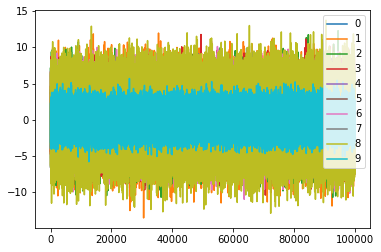

In [9]:
rdata = corr_random(n,mean,rcov)
# 绘制随机数变化图
rdata = pd.DataFrame(rdata)
rdata.plot()

In [10]:
#检查cov是否与给定一致????
temp = rdata.cov()
tempcorr = rdata.corr()
print('得到的随机数序列的cov')
temp

得到的随机数序列的cov


,0,1,2,3,4,5,6,7,8,9
0,1.869153,3.099881,1.567710,1.227553,0.914369,0.299877,1.231830,0.968268,2.781900,0.050553
1,3.099881,8.597150,2.446856,0.838932,1.467991,-0.222763,0.765365,1.407575,3.714007,-0.999675
2,1.567710,2.446856,7.102248,0.412395,1.511118,0.789001,1.462963,2.036295,3.852548,0.133954
3,1.227553,0.838932,0.412395,6.196503,1.289534,2.616829,3.153770,1.711748,5.189538,0.149808
4,0.914369,1.467991,1.511118,1.289534,3.282111,0.231881,1.601479,3.247634,2.856020,-0.298956
5,0.299877,-0.222763,0.789001,2.616829,0.231881,2.108966,1.386140,0.930178,2.363393,-0.129303
6,1.231830,0.765365,1.462963,3.153770,1.601479,1.386140,6.602721,0.859461,5.136078,-0.408578
7,0.968268,1.407575,2.036295,1.711748,3.247634,0.930178,0.859461,4.402378,3.158634,-0.366986
8,2.781900,3.714007,3.852548,5.189538,2.856020,2.363393,5.136078,3.158634,10.041897,1.466946
9,0.050553,-0.999675,0.133954,0.149808,-0.298956,-0.129303,-0.408578,-0.366986,1.466946,1.760564


In [11]:
print('输入函数的预定cov')
pd.DataFrame(rcov)

输入函数的预定cov


,0,1,2,3,4,5,6,7,8,9
0,1.871458,3.114020,1.549267,1.229610,0.910965,0.299665,1.239621,0.958533,2.765358,0.035106
1,3.114020,8.654495,2.404282,0.852622,1.458717,-0.227763,0.782536,1.387455,3.711144,-1.019215
2,1.549267,2.404282,7.102433,0.406217,1.488543,0.798091,1.441668,2.011417,3.817340,0.135851
3,1.229610,0.852622,0.406217,6.256876,1.293323,2.654386,3.178268,1.718561,5.216429,0.132777
4,0.910965,1.458717,1.488543,1.293323,3.256355,0.239327,1.595441,3.220023,2.832895,-0.302818
5,0.299665,-0.227763,0.798091,2.654386,0.239327,2.128662,1.398349,0.943854,2.376813,-0.138102
6,1.239621,0.782536,1.441668,3.178268,1.595441,1.398349,6.601297,0.848963,5.138293,-0.413673
7,0.958533,1.387455,2.011417,1.718561,3.220023,0.943854,0.848963,4.378728,3.120162,-0.380306
8,2.765358,3.711144,3.817340,5.216429,2.832895,2.376813,5.138293,3.120162,9.980075,1.425943
9,0.035106,-1.019215,0.135851,0.132777,-0.302818,-0.138102,-0.413673,-0.380306,1.425943,1.746382


# 输入一个非半正定的协方差矩阵

In [12]:
#生成一个非半正定的相关系数矩阵
#产生N*N的相关系数矩阵 数据位于-0.9 0.9 之间
rrho= np.random.random((N,N)) *(np.random.choice([-0.9, 0.9],(N,N)))
row, col = np.diag_indices_from(rrho) 
rrho[row, col] = [1] * len(rrho)#对主对角线进行赋值
for i in range(N):#对下三角位置进行赋值
    for j in range(i,N):
        rrho[i,j] = rrho[j,i]

In [13]:
#判断产生的corr是否为半正定矩阵   -1代表无法进行cholesky分解
print(is_pos_def(rrho))

不是半正定矩阵-1


In [14]:
# 随机产生N个方差 值位于0-10之间？
rsigma_list = (np.random.randint(0,10,N) + np.random.random(N))
rsigma = np.diag(rsigma_list)
rcov = np.sqrt(np.matrix(rsigma)) @ np.matrix(rrho) @ np.sqrt(np.matrix(rsigma))
#判断产生的cov是否为半正定矩阵
print(is_pos_def(rcov))

不是半正定矩阵-1


协方差阵的目的就是用来求一组具备给定协方差关系/相关关系的随机数序列


如果协方差阵非正定？那么不能使用cholesky分解，从而不能得到一个下三角矩阵L


**<font color = red>使用cvxpy计算一个距离给定corr最近的（F范数）&符合半正定条件的新相关系数矩阵</font>**使其可以进行cholesky分解

https://www.cvxpy.org/api_reference/cvxpy.constraints.html

In [20]:
import cvxpy as cvx

n = N
m = 0.01 #设定求出来的corr的特征值的最小值
origin = rrho

print('修改前的相关系数矩阵为：')
print(is_pos_def(origin))
print(pd.DataFrame(origin))

修改前的相关系数矩阵为：
不是半正定矩阵-1
          0         1         2         3         4         5         6  \
0  1.000000 -0.648657 -0.494226 -0.061794  0.232383  0.186881  0.345093   
1 -0.648657  1.000000  0.690039  0.380933  0.861378  0.737021 -0.198795   
2 -0.494226  0.690039  1.000000  0.178691  0.719034  0.239927  0.826034   
3 -0.061794  0.380933  0.178691  1.000000  0.071155  0.884628  0.739028   
4  0.232383  0.861378  0.719034  0.071155  1.000000  0.847519  0.011358   
5  0.186881  0.737021  0.239927  0.884628  0.847519  1.000000 -0.196017   
6  0.345093 -0.198795  0.826034  0.739028  0.011358 -0.196017  1.000000   
7  0.249440  0.612201  0.652928 -0.506266  0.891284  0.473618 -0.401771   
8 -0.402274 -0.835242  0.239058 -0.725593 -0.289366  0.664352 -0.884512   
9 -0.158742 -0.134534  0.160972  0.450948  0.177670  0.680009  0.330204   

          7         8         9  
0  0.249440 -0.402274 -0.158742  
1  0.612201 -0.835242 -0.134534  
2  0.652928  0.239058  0.160972  
3 -0.506266 -0.

In [21]:
x = cvx.Variable((n,n))#,symmetric=True) 
objective = cvx.Minimize(cvx.norm(x - origin,'fro')) 
constraints = [cvx.PSD(x-m*np.eye(n,n)),cvx.diag(x)==1,x==x.T] 
prob = cvx.Problem(objective, constraints) 
prob.solve() 

change_rrho = x.value

print('修改后的相关系数矩阵为：')
print(is_pos_def(change_rrho))
print(pd.DataFrame(change_rrho))

修改后的相关系数矩阵为：
是半正定矩阵
          0         1         2         3         4         5         6  \
0  1.000000 -0.374852 -0.355239 -0.013520  0.125156 -0.005706  0.205427   
1 -0.374852  1.000000  0.558552  0.342783  0.735439  0.475917 -0.003136   
2 -0.355239  0.558552  1.000000  0.179084  0.611838  0.313658  0.399523   
3 -0.013520  0.342783  0.179084  1.000000  0.164779  0.461095  0.602567   
4  0.125156  0.735439  0.611838  0.164779  1.000000  0.686742  0.014247   
5 -0.005706  0.475917  0.313658  0.461095  0.686742  1.000000 -0.126213   
6  0.205427 -0.003136  0.399523  0.602567  0.014247 -0.126213  1.000000   
7  0.160468  0.614621  0.431114 -0.261838  0.852525  0.319659 -0.193722   
8 -0.282204 -0.411561 -0.092355 -0.445594 -0.244711  0.166090 -0.588297   
9 -0.043998  0.020979  0.180134  0.502579  0.174884  0.526687  0.295486   

          7         8         9  
0  0.160468 -0.282204 -0.043998  
1  0.614621 -0.411561  0.020979  
2  0.431114 -0.092355  0.180134  
3 -0.261838 -0.445

In [22]:
print('修改后的相关系数矩阵特征值分解如下：')
l,S = np.linalg.eig(change_rrho)
print(l)

修改后的相关系数矩阵特征值分解如下：
[3.58172927 2.20934128 1.64281156 1.30255073 0.78141691 0.44218604
 0.00998373 0.00999075 0.00999291 0.00999687]
